In [160]:
import numpy as np
import pandas as pd

# Key is the place of power plant, value is the place we use to fetch the weather condition for the power plant
Power_Weather_Dict = {
    "台南麻豆":"台南",
    "嘉義義竹":"嘉義",
    "屏東崁頂":"屏東",
    "彰化大城":"台中",
    "雲林台西":"嘉義"
}

Power_Capacity_Dict = {
    "台南麻豆": 258.572,
    "嘉義義竹": 335.92,
    "屏東崁頂": 405.0,
    "彰化大城": 78.0,
    "雲林台西": 112.7
}

# The directories that store power and weather csv files
POWER_DIR = "power"
WEATHER_DIR = "weather"

START_DATE = "20180501"
END_DATE   = "20190430"

## Merge power generated and weather condition for all the power plants and store it into a dataframe.

In [161]:
def obsTime_Converter(year, month, day, hour):
    return("{}{:02d}{:02d}{:02d}".format(year, month, day, hour))

all_data = pd.DataFrame()
for power_plant, weather_station in Power_Weather_Dict.items():
    
    power_df = pd.read_csv("{}/{}.csv".format(POWER_DIR, power_plant))
    weather_df = pd.read_csv("{}/Final_Project_Crawler_{}.csv".format(WEATHER_DIR, weather_station),encoding="utf-8")
    
    obsTime = []
    for index, row in weather_df.iterrows():
        row["DATE"] = str(row["DATE"])
        year  = row["DATE"][:4]
        month = int(row["DATE"][4:6])
        day   = int(row["DATE"][6:8])
        hour  = int(row["ObsTime"])
        obsTime.append(obsTime_Converter(year, month, day, hour-1))
    
    weather_df["obsTime"] = pd.to_numeric(obsTime)
    
    weather_df = weather_df.drop(columns=['DATE', 'ObsTime'])
    merge_df = pd.merge(power_df, weather_df, on='obsTime', how='left')
    merge_df["power_plant"] = [power_plant for i in range(merge_df.shape[0])]
    merge_df["capacity"] = [Power_Capacity_Dict[power_plant] for i in range(merge_df.shape[0])]
    all_data = pd.concat([all_data, merge_df], axis=0, ignore_index=True, sort=False)
    
    
    print(power_plant, all_data["kwh"].mean())

all_data.head()

台南麻豆 39.78643216080402
嘉義義竹 43.96128369118319
屏東崁頂 3016.1790010659356
彰化大城 2266.452860895386
雲林台西 1816.7622430333486


,kwh,radiation,obsTime,Unnamed: 0,StnPres,SeaPres,Temperature,Td dew point,RH,WS,...,WDGust,Precp,PrecpHour,SunShine,GloblRad,Visb,UVI,Cloud Amount,power_plant,capacity
0,0,0,2018050100,0,1011.6,1012.7,26.5,22.0,76,1.2,...,120,0.0,0.0,...,0.00,...,...,...,台南麻豆,258.572
1,0,0,2018050101,1,1011.1,1012.2,26.3,21.9,77,1.2,...,120,0.0,0.0,...,0.00,...,...,...,台南麻豆,258.572
2,0,0,2018050102,2,1010.9,1012.0,26.1,21.7,77,1.4,...,120,0.0,0.0,...,0.00,...,...,...,台南麻豆,258.572
3,0,0,2018050103,3,1010.8,1011.9,26.0,21.6,77,1.0,...,140,0.0,0.0,...,0.00,...,...,...,台南麻豆,258.572
4,0,0,2018050104,4,1011.1,1012.2,25.7,21.5,78,1.9,...,140,0.0,0.0,...,0.00,...,...,...,台南麻豆,258.572


In [169]:
all_data.to_csv("all_power.csv", encoding="utf_8")

## Choose the features and data preprocessing

In [175]:
# X_FEATURES = ["WS","Temperature","RH","StnPres","SeaPres","PrecpHour","SunShine","GloblRad","Cloud Amount","UVI"]
X_FEATURES = ["GloblRad"]
PREDICT_FEATURE = "kwh"

# ======== Obvious Error Data ==================
all_data = all_data.drop(all_data.index[18579])
all_data = all_data.drop(all_data.index[17812])
all_data = all_data.drop(all_data.index[17811])
# ==============================================

data_raw = all_data[X_FEATURES]
data_raw["y"] = all_data[PREDICT_FEATURE]/all_data["capacity"]
data_raw["capacity"] = all_data["capacity"]

print(data_raw.head())
print("Raw Data Shape: ", data_raw.shape)

for col in data_raw.columns:
    data_raw[col] = data_raw[col].astype(str).str.replace(u'\xa0','')
data = data_raw.replace({'...':np.nan, 'T':"0", "X":np.nan})
data = data.dropna(axis=0)

for col in data.columns:
    data[col] = pd.to_numeric(data[col])

print(data.head())
print("Data Shape: ", data.shape)

c:\users\ndshen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\users\ndshen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\ndshen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

  GloblRad    y  capacity
0    0.00   0.0   258.572
1    0.00   0.0   258.572
2    0.00   0.0   258.572
3    0.00   0.0   258.572
4    0.00   0.0   258.572
Raw Data Shape:  (43762, 3)
   GloblRad    y  capacity
0       0.0  0.0   258.572
1       0.0  0.0   258.572
2       0.0  0.0   258.572
3       0.0  0.0   258.572
4       0.0  0.0   258.572
Data Shape:  (43591, 3)


In [140]:
test = data[["capacity","y"]]
test.groupby("capacity").mean()
# test[test["capacity"] == 78]

,y
capacity,
112.70,0.372569
335.92,0.333899
405.00,0.289178


## Peak into the characteristic of the kwh value

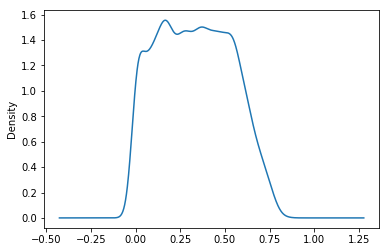

In [149]:
import matplotlib.pyplot as plt
ax = data["y"].plot.kde()
plt.show()

In [183]:
print("Mean of y: ", data["y"].mean())
print("Standard Deviation of y: ", data["y"].std())
print("Max of y: ", data["y"].max())
print("Min of y: ", data["y"].min())

Mean of y:  0.16002594944329154
Standard Deviation of y:  1.8089112635113
Max of y:  316.0897435897436
Min of y:  0.0


## See the relationship between each feature and kwh value

c:\users\ndshen\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


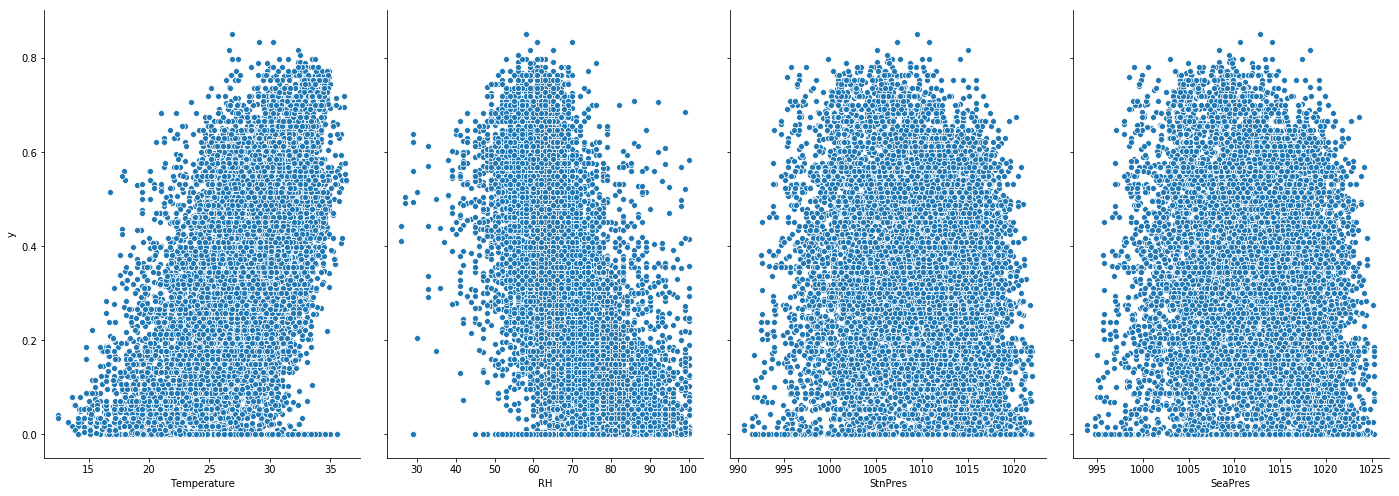

In [151]:
import seaborn as sns
sns.pairplot(data, x_vars=["Temperature","RH","StnPres","SeaPres"], y_vars='y', size=7, aspect=0.7)

c:\users\ndshen\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


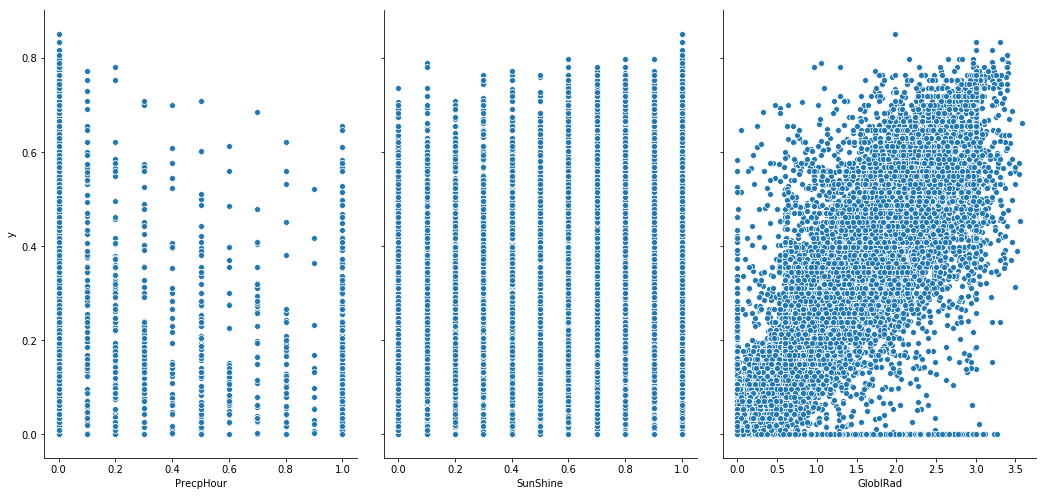

In [92]:
 sns.pairplot(data, x_vars=["PrecpHour","SunShine","GloblRad"], y_vars='y', size=7, aspect=0.7)

c:\users\ndshen\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


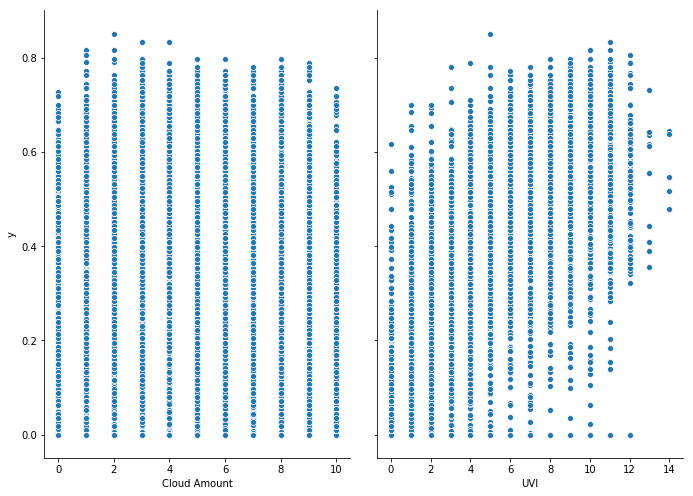

In [93]:
 sns.pairplot(data, x_vars=["Cloud Amount","UVI"], y_vars='y', size=7, aspect=0.7)

In [108]:
def Accuracy_Capacity(predictions, observations, capacity):
    predictions = list(predictions)
    observations = list(observations)
    if len(predictions) != len(observations):
        raise ValueError("The sizes of predictions and observations are not equal.")
    abs_error_sum = 0
    for i in range(len(predictions)):
        abs_error_sum += abs(predictions[i] - observations[i])
    
    MAPE = abs_error_sum/(len(predictions)*capacity)
    return(1 - MAPE)

def Accuracy_Capacity2(predictions, observations):
    predictions = list(predictions)
    observations = list(observations)
    if len(predictions) != len(observations):
        raise ValueError("The sizes of predictions and observations are not equal.")
    abs_error_sum = 0
    for i in range(len(predictions)):
        abs_error_sum += abs(predictions[i] - observations[i])
    
    MAPE = abs_error_sum/(len(predictions))
    return(1 - MAPE)

def Accuracy_Actual_Power(predictions, observations):
    predictions = list(predictions)
    observations = list(observations)
    if len(predictions) != len(observations):
        raise ValueError("The sizes of predictions and observations are not equal.")
    
    error_sum = 0
    for i in range(len(predictions)):
        try:
            error_sum += (abs(predictions[i] - observations[i])/observations[i])
        except ZeroDivisionError:
            error_sum += abs(predictions[i] - observations[i])
    MAPE = error_sum/len(predictions)
    return(1 - MAPE)

In [176]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.1)
print("Training Dataset Shape: ", train.shape)
print("Testing Dataset Shape: ", test.shape)

Training Dataset Shape:  (39231, 3)
Testing Dataset Shape:  (4360, 3)


In [177]:
train_x_std = train[X_FEATURES]
train_y_demean = train["y"]
test_x_std = test[X_FEATURES]
test_y_demean = test["y"]

In [178]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

scaler = StandardScaler()
train_X = train[X_FEATURES]
scaler.fit(train_X)
train_x_std = scaler.transform(train_X)
y_mean = train["y"].mean()
train_y_demean = train["y"] - y_mean

test_y_demean = test["y"] - y_mean
scaler_mean = scaler.mean_
scaler_std = [sqrt(x) for x in scaler.var_]
test_x_std = pd.DataFrame()
for i, column in enumerate(test[X_FEATURES]):
    test_x_std[column] = (test[column] - scaler_mean[i])/scaler_std[i]

print("test_x_std")
print(test_x_std.head())
print()
print("test_y_demean")
print(test_y_demean[:5])

test_x_std
       GloblRad
39289 -0.683695
40274 -0.683695
43181 -0.683695
41073 -0.683695
26821 -0.683695

test_y_demean
39289   -0.153040
40274   -0.161913
43181   -0.161913
41073   -0.161913
26821   -0.161913
Name: y, dtype: float64


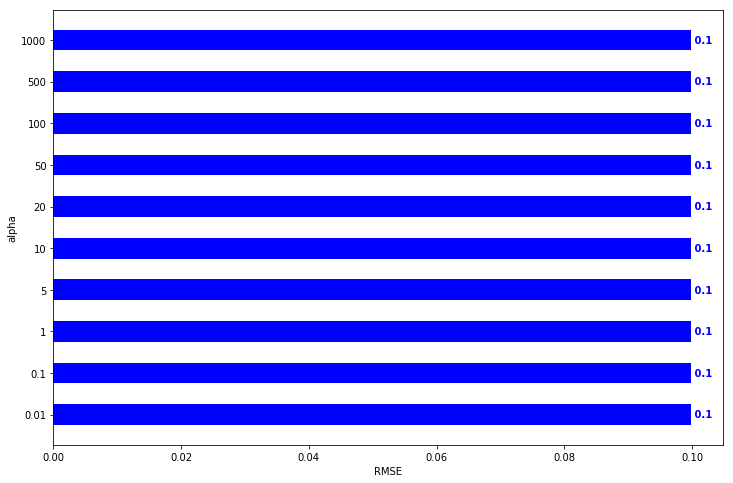

Min RMSE:  0.09974678039000817
Min alpha:  1000
Accuracy Capacity 0.9368165246930953


In [179]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

alpha_list = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]


#============== not to standarize the features and not to demean the value gives a better result ?!
# train_x_std = train[FEATURES]
# train_y_demean = train["y"]
# test_x_std = test[FEATURES]
# test_y_demean = test["y"]
#==============


rmse_list = []
for a in alpha_list:
    clf = Ridge(alpha=a)
    clf.fit(train_x_std, train_y_demean)
    prediction = clf.predict(test_x_std)
    rmse = sqrt(mean_squared_error(test_y_demean, prediction))
    rmse_list.append(rmse)

x = alpha_list
y = rmse_list

fig, ax = plt.subplots()  
fig.set_size_inches(12,8)
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
plt.xlabel('RMSE')
plt.ylabel('alpha')    
for i, v in enumerate(y):
    ax.text(v, i, " "+str(round(v,3)), va='center',color='blue', fontweight='bold')

plt.show()
print("Min RMSE: ", min(rmse_list))
print("Min alpha: ", alpha_list[rmse_list.index(min(rmse_list))])

best_alpha = alpha_list[rmse_list.index(min(rmse_list))]
clf = Ridge(alpha=best_alpha)
clf.fit(train_x_std, train_y_demean)
prediction = clf.predict(test_x_std)
print("Accuracy Capacity",Accuracy_Capacity2(prediction+y_mean, test_y_demean+y_mean))

In [180]:
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
result = sm.OLS(train_y_demean, train_x_std).fit()
print(result.summary())

prediction = result.predict(test_x_std)
rmse = sqrt(mean_squared_error(test_y_demean, prediction))
# print()
print("RMSE: ",rmse)

print("Accuracy Capacity",Accuracy_Capacity2(prediction, test_y_demean))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     409.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.22e-90
Time:                        17:27:08   Log-Likelihood:                -80755.
No. Observations:               39231   AIC:                         1.615e+05
Df Residuals:                   39230   BIC:                         1.615e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1937      0.010     20.242      0.0